# Feature Engineering: Feature Creation

### Read in text

In [1]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create feature for text message length

In [2]:
#try to create a new column by applying a labda function over 'body_text' column.
#for the length of the message, try to differantiate between a message with full of charachters and full of white spaces.
#to do that, you can substract the count of the white spaces
data['body_length'] = data['body_text'].apply(lambda x: len(x) - x.count(' '))

data.head()

,label,body_text,body_length
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",49
2,ham,Even my brother is not like to speak with me. ...,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135


### Create feature for % of text that is punctuation

In [19]:
import string

def count_punct(text):
    cnt = sum([1 for char in text if char in string.punctuation])
    return round(cnt/(len(text)-text.count(' ')), 3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()
    
#the function above returns 1 everytime it sees a text message. Then, it sums them up.


,label,body_text,body_length,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


### Evaluate created features

In [20]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

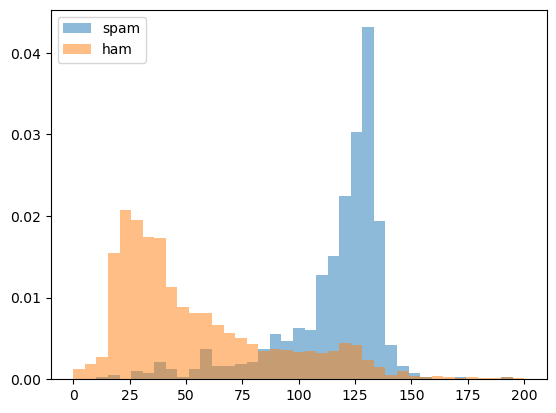

In [21]:
#starting point, body_length, number_of_cut_points (number of evenly spaced numbers)
bins = np.linspace(0, 200, 40)

pyplot.hist(data[data['label']=='spam']['body_length'], bins, alpha = 0.5, density = True, label = 'spam')
pyplot.hist(data[data['label']=='ham']['body_length'], bins, alpha = 0.5, density = True, label = 'ham')
pyplot.legend(loc = 'upper left')
pyplot.show()

#The histogram below shows that the spam messages are tend to be longer

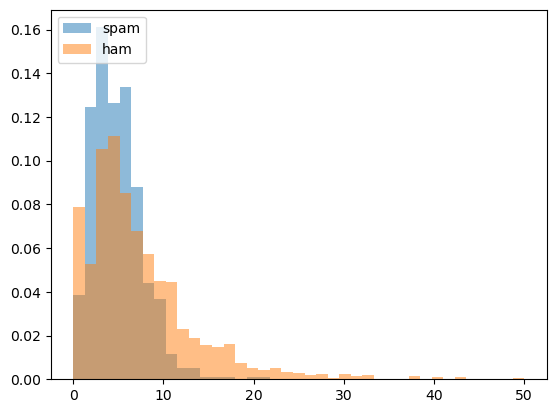

In [22]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data[data['label']=='spam']['punct%'], bins, alpha = 0.5, density = True, label = 'spam')
pyplot.hist(data[data['label']=='ham']['punct%'], bins, alpha = 0.5, density = True, label = 'ham')
pyplot.legend(loc = 'upper left')
pyplot.show()